<a href="https://colab.research.google.com/github/hnf71z/tubes_AI/blob/main/4_33_23_1_09_Hanif_Abdusy_Syakur_TUBESAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####-- IDENTITAS --
#####NAMA       : HANIF ABDUSY SYAKUR
#####NIM        : 4.33.23.1.09
#####KELAS      : TI-2B



In [1]:
# Import dataset dari gdrive
from google.colab import drive
drive.mount('/content/drive')

dataset_path = "/content/drive/My Drive/project_ml/fruit-detect.yolov8"

!cp -r "/content/drive/My Drive/project_ml/fruit-detect.yolov8" "/content/fruit-detect.yolov8"

Mounted at /content/drive


In [3]:
data_yaml_path = '/content/fruit-detect.yolov8/data.yaml'
data_dir_cnn = '/content/fruit-detect.yolov8/dataset_cnn/train/'

In [2]:
# Tahap 1: Persiapan Data untuk YOLO

import os
import shutil
import random

# --- Konfigurasi Path ---
train_img_dir = 'fruit-detect.yolov8/train/images'
train_lbl_dir = 'fruit-detect.yolov8/train/labels'
valid_img_dir = 'fruit-detect.yolov8/valid/images'
valid_lbl_dir = 'fruit-detect.yolov8/valid/labels'

# --- Membuat Direktori Validasi (jika belum ada) ---
os.makedirs(valid_img_dir, exist_ok=True)
os.makedirs(valid_lbl_dir, exist_ok=True)

# --- Memindahkan Sebagian Data Training ke Validasi (jika folder validasi kosong) ---
if not os.listdir(valid_img_dir):
    print("Folder validasi kosong. Memindahkan 20% data training ke validasi...")
    img_files = [f for f in os.listdir(train_img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Mengambil sampel acak 20% dari file
    jumlah_validasi = max(1, int(0.2 * len(img_files)))
    img_validasi = random.sample(img_files, jumlah_validasi)

    for img_name in img_validasi:
        # Pindahkan file gambar
        shutil.move(os.path.join(train_img_dir, img_name), os.path.join(valid_img_dir, img_name))

        # Pindahkan file label yang sesuai
        label_name = os.path.splitext(img_name)[0] + '.txt'
        src_label_path = os.path.join(train_lbl_dir, label_name)
        if os.path.exists(src_label_path):
            shutil.move(src_label_path, os.path.join(valid_lbl_dir, label_name))

    print(f"Berhasil memindahkan {len(img_validasi)} gambar dan label ke folder validasi.")
else:
    print("Folder validasi sudah berisi data. Tidak ada file yang dipindahkan.")

Folder validasi kosong. Memindahkan 20% data training ke validasi...
Berhasil memindahkan 1100 gambar dan label ke folder validasi.


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [1]:
# Tahap 2: Training Model YOLOv8

from ultralytics import YOLO
import torch

# Konfigurasi GPU (MPS untuk Mac)
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f"Training akan menggunakan: {device.upper()}")

# Memuat Model & Training
model_yolo = YOLO('yolov8n.pt')

# Path ke file konfigurasi dataset
data_yaml_path = 'fruit-detect.yolov8/data.yaml'

# Mulai training
results = model_yolo.train(
    data=data_yaml_path,
    epochs=10,
    imgsz=416,
    device=device,
    name='yolov8n_fruit_detection',
    batch=36
)

print("\nTraining YOLOv8 selesai.")
print("Hasil training tersimpan di folder 'runs/detect/yolov8n_fruit_detection'.")

Training akan menggunakan: CPU
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=96, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=fruit-detect.yolov8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_fruit_detection3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

train: Scanning /content/fruit-detect.yolov8/train/labels.cache... 4396 images, 8 backgrounds, 0 corrupt: 100%|██████████| 4404/4404 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 20.1±9.7 MB/s, size: 40.3 KB)


val: Scanning /content/fruit-detect.yolov8/valid/labels.cache... 1098 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1100/1100 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_fruit_detection3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000476, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00075), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8n_fruit_detection3
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      1.465      4.063      1.583        545        416:   2%|▏         | 1/46 [01:12<54:17, 72.40s/it]


KeyboardInterrupt: 

Melakukan deteksi pada gambar: fruit-detect.yolov8/valid/images/freshMango-209-_png.rf.d5366297dc4370f7cc457cba926f007e.jpg

image 1/1 /content/fruit-detect.yolov8/valid/images/freshMango-209-_png.rf.d5366297dc4370f7cc457cba926f007e.jpg: 416x416 6 Mangos, 79.5ms
Speed: 2.2ms preprocess, 79.5ms inference, 3.6ms postprocess per image at shape (1, 3, 416, 416)


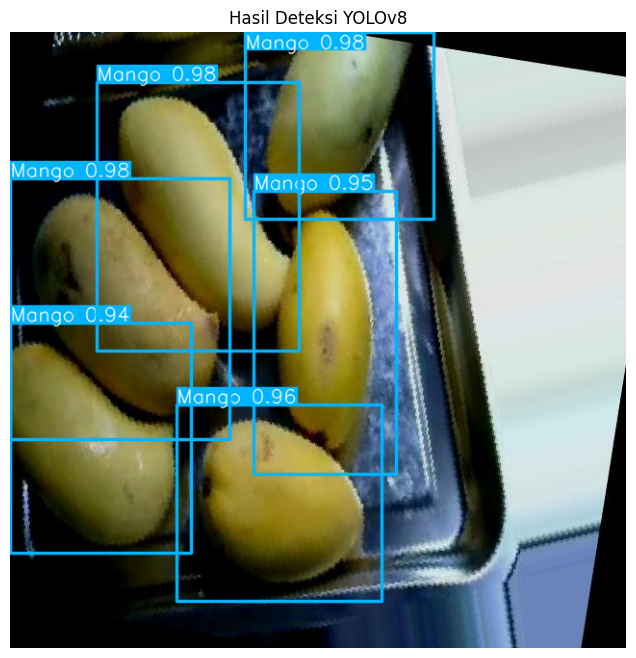

In [9]:
# Tahap 3: Inferensi (Uji Coba Deteksi) dengan Model YOLO

import cv2
import matplotlib.pyplot as plt

# Memuat Model Terbaik Hasil Training
# Path ke model terbaik akan berada di dalam folder hasil training
path_to_best_model = 'runs/detect/yolov8n_fruit_detection/weights/best.pt'
model_yolo_best = YOLO(path_to_best_model)

# Ambil satu gambar acak dari folder validasi untuk diuji
path_gambar_uji = os.path.join(valid_img_dir, random.choice(os.listdir(valid_img_dir)))

print(f"Melakukan deteksi pada gambar: {path_gambar_uji}")

# Lakukan deteksi
results_inference = model_yolo_best.predict(path_gambar_uji)

# Tampilkan Hasil Deteksi
# Hasil deteksi (results_inference) adalah list, kita ambil elemen pertama
res_plotted = results_inference[0].plot() # plot() menghasilkan gambar dengan bounding box

# Tampilkan gambar menggunakan matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.title("Hasil Deteksi YOLOv8")
plt.axis('off')
plt.show()

In [3]:
# TAHAP CNN

# Tahap 4: Memuat dan Menyiapkan Data untuk Klasifikasi CNN

import tensorflow as tf

# Konfigurasi Dataset
# Path ke direktori yang berisi folder-folder kelas gambar
data_dir_cnn = 'fruit-detect.yolov8/dataset_cnn/train/'
img_height = 128
img_width = 128
batch_size = 32

# Memuat Dataset dari Direktori
# Keras akan secara otomatis membagi data menjadi training dan validasi
print("Memuat dataset untuk CNN...")
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_cnn,
    validation_split=0.2,  # 20% data untuk validasi
    subset="both",
    seed=123,  # Seed untuk memastikan split yang sama setiap kali dijalankan
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical' # Untuk klasifikasi multi-kelas
)

# Simpan nama-nama kelas
class_names = train_ds.class_names
print(f"\nDitemukan {len(class_names)} kelas: {class_names}")

# Normalisasi dan Optimasi Pipeline Data
# Normalisasi nilai piksel dari [0, 255] ke [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Menggunakan cache dan prefetch untuk performa I/O yang lebih baik
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("\nDataset CNN siap untuk training.")

Memuat dataset untuk CNN...
Found 5504 files belonging to 17 classes.
Using 4404 files for training.
Using 1100 files for validation.

Ditemukan 17 kelas: ['Apple', 'Banana', 'Blueberry', 'Cantaloupe', 'Coconut', 'Dragon_fruit', 'Grapes', 'Guava', 'Kiwi', 'Lemon', 'Mango', 'Orange', 'Pear', 'Pineapple', 'Pomegranate', 'Raspberry', 'Strawberry']

Dataset CNN siap untuk training.


In [4]:
# Tahap 5: Membangun dan Melatih Model CNN

from tensorflow.keras import layers, models

# Data Augmentation
# Untuk meningkatkan variasi data training dan mengurangi overfitting
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Membangun Arsitektur Model CNN
num_classes = len(class_names)

model_cnn = models.Sequential([
    # Input layer
    layers.Input(shape=(img_height, img_width, 3)),

    # Terapkan augmentasi hanya saat training
    data_augmentation,

    # Blok Konvolusi 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten dan Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Dropout untuk regularisasi
    layers.Dense(num_classes, activation='softmax') # Output layer
])

# Compile Model
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Tampilkan ringkasan arsitektur model
model_cnn.summary()

# Melatih Model
print("\nMemulai training model CNN...")
epochs_cnn = 15 # Anda bisa menambahkannya jika akurasi masih terus meningkat
history_cnn = model_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_cnn
)

print("\nTraining CNN selesai.")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,833 (12.61 MB)

 Trainable params: 3,306,833 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


Memulai training model CNN...
Epoch 1/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 134s 954ms/step - accuracy: 0.2202 - loss: 2.5360 - val_accuracy: 0.5227 - val_loss: 1.4532
Epoch 2/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 128s 927ms/step - accuracy: 0.4541 - loss: 1.6430 - val_accuracy: 0.5664 - val_loss: 1.2070
Epoch 3/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 123s 892ms/step - accuracy: 0.5093 - loss: 1.4706 - val_accuracy: 0.6145 - val_loss: 1.0622
Epoch 4/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 120s 871ms/step - accuracy: 0.5437 - loss: 1.3057 - val_accuracy: 0.6845 - val_loss: 0.9337
Epoch 5/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 124s 902ms/step - accuracy: 0.5836 - loss: 1.1693 - val_accuracy: 0.7273 - val_loss: 0.8433
Epoch 6/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 119s 864ms/step - accuracy: 0.6396 - loss: 1.0610 - val_accuracy: 0.7482 - val_loss: 0.7957
Epoch 7/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 140s 852ms/step - accuracy: 0.6502 - loss: 1.0258 - val_accuracy: 0.7655 - val_loss: 0.7762
Epoch 8/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 125s 

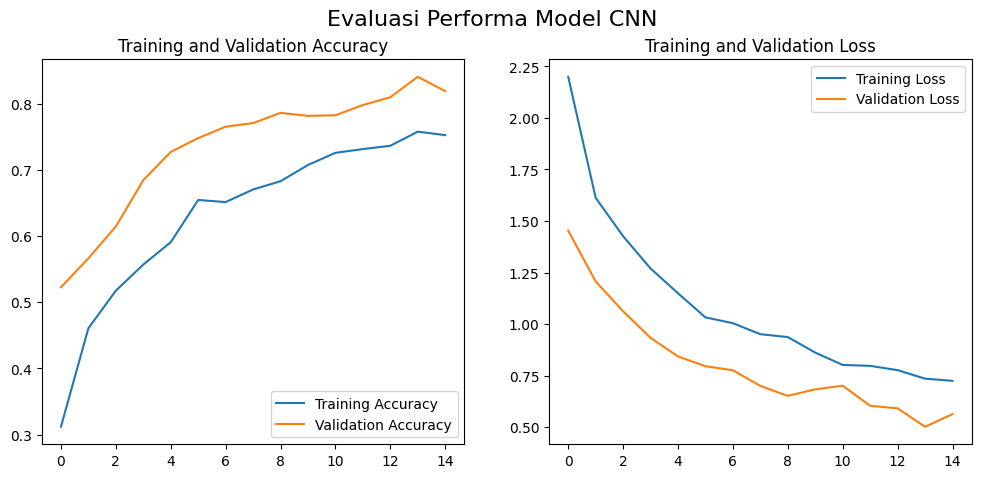

In [8]:
# Tahap 6: Evaluasi dan Visualisasi Hasil CNN

import matplotlib.pyplot as plt
import numpy as np

acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs_range = range(epochs_cnn)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.suptitle("Evaluasi Performa Model CNN", fontsize=16)
plt.show()

In [ ]:
# 5. Salin semua hasil PENTING KEMBALI ke Google Drive untuk disimpan permanen
print("Menyimpan hasil training kembali ke Google Drive...")

# Buat folder tujuan di Drive jika belum ada
!mkdir -p "/content/drive/MyDrive/project_ml/hasil_training/runs"
!mkdir -p "/content/drive/MyDrive/project_ml/hasil_training/models"

# Salin folder hasil YOLO
!cp -r "/content/runs" "/content/drive/MyDrive/project_ml/hasil_training/runs/"

# Salin model CNN
!cp -r "/content/models" "/content/drive/MyDrive/project_ml/hasil_training/models/"

print("Semua hasil training berhasil disimpan secara permanen di Google Drive!")

In [9]:
# --- SCRIPT FINAL: SIMPAN SEMUA HASIL PENTING KE GOOGLE DRIVE ---

import os

# 1. Tentukan folder tujuan utama di Google Drive Anda
#    Ini membuat kode lebih mudah diatur.
target_drive_folder = "/content/drive/MyDrive/project_ml/hasil_akhir_proyek"

print(f"Memulai proses penyimpanan ke: {target_drive_folder}")

# 2. Buat folder tujuan utama di Drive (tidak akan error jika sudah ada)
!mkdir -p "{target_drive_folder}"

# 3. Salin folder hasil training YOLO ('runs')
#    Kita cek dulu apakah folder sumbernya ada untuk menghindari error.
if os.path.isdir("/content/runs"):
    print("Menyalin folder 'runs'...")
    !cp -r "/content/runs" "{target_drive_folder}/"
else:
    print("Peringatan: Folder '/content/runs' tidak ditemukan, tidak ada yang disalin.")

# 4. Salin folder model CNN ('models')
if os.path.isdir("/content/models"):
    print("Menyalin folder 'models'...")
    !cp -r "/content/models" "{target_drive_folder}/"
else:
    print("Peringatan: Folder '/content/models' tidak ditemukan, tidak ada yang disalin.")

# 5. (Opsional) Jika Anda juga ingin mem-backup dataset dari Colab ke Drive
if os.path.isdir("/content/fruit-detect.yolov8"):
    print("Menyalin folder dataset 'fruit-detect.yolov8'...")
    !cp -r "/content/fruit-detect.yolov8" "{target_drive_folder}/"
else:
    print("Peringatan: Folder dataset '/content/fruit-detect.yolov8' tidak ditemukan.")

print("\n✅ Proses penyimpanan ke Google Drive selesai!")

Memulai proses penyimpanan ke: /content/drive/MyDrive/project_ml/hasil_akhir_proyek
Menyalin folder 'runs'...
Peringatan: Folder '/content/models' tidak ditemukan, tidak ada yang disalin.
Menyalin folder dataset 'fruit-detect.yolov8'...

✅ Proses penyimpanan ke Google Drive selesai!
